# Survival curves (Kaplan-Meier)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/tljh/user/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [ ]:
KaplanMeierFitter.fit()

In [73]:
!pip install lifelines

In [116]:
# allow graphs
%matplotlib inline

In [75]:
#df = pd.read_csv(r'rhc.csv')
df = pd.read_csv(r'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/rhc.csv')

In [79]:
df['male'] = np.where(df.sex == 'Male', 1, 0)

In [80]:
df['treated'] = df.swang1

dth30 #Dead within 30 day

t3d30 #survival times

In [81]:
df.dth30.head(), df.t3d30.head()

(0     No
 1     No
 2     No
 3     No
 4    Yes
 Name: dth30, dtype: object, 0    30
 1    30
 2    30
 3    30
 4     2
 Name: t3d30, dtype: int64)

In [84]:
df['time'] = df.t3d30

In [85]:
df['observed'] = df.dth30

In [86]:
df.observed = np.where(df.observed == 'Yes',1,0)

In [87]:
kmf = KaplanMeierFitter()

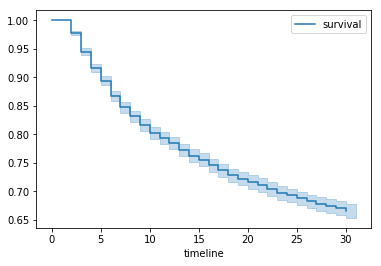

In [88]:
kmf.fit(df.time, df.observed, label = 'survival')
kmf.plot()


In [90]:
df.treated.unique()

array(['No RHC', 'RHC'], dtype=object)

No RHC
RHC


Text(0.5,0,'Days after hospitalization')

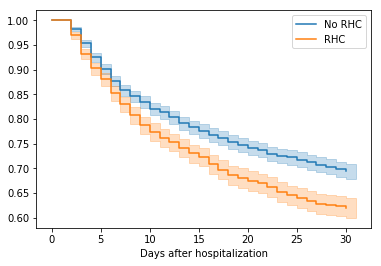

In [94]:
ax = plt.subplot()
for treatment in df.treated.unique():
    print(treatment)
    kmf.fit(df[df.treated == treatment].time, df[df.treated == treatment].observed, label = treatment)
    kmf.plot(ax=ax)
plt.xlabel('Days after hospitalization')

Text(0,0.5,'Proportion surviving')

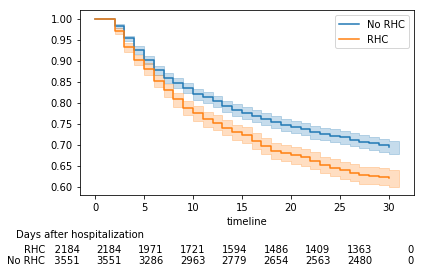

In [95]:
from lifelines.plotting import add_at_risk_counts

ax = plt.subplot()

rhc = df[df.treated == 'RHC'] #patients who received treatment
nrhc = df[df.treated == 'No RHC'] #patients who did not received treatment


kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(nrhc.time, nrhc.observed, label='No RHC').plot(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(rhc.time, rhc.observed, label='RHC').plot(ax=ax)

add_at_risk_counts(kmf_exp, kmf_control, ax=ax)
plt.xlabel('Days after hospitalization')
plt.ylabel('Proportion surviving')

In [96]:
kmf_exp.survival_function_

,RHC
timeline,
0.0,1.000000
2.0,0.970238
3.0,0.932234
4.0,0.902473
5.0,0.880495
6.0,0.852106
7.0,0.829670
8.0,0.807692
9.0,0.788004


In [98]:
from lifelines.statistics import logrank_test

results = logrank_test(nrhc.time, rhc.time, event_observed_A = nrhc.observed, event_observed_B = rhc.observed)
results.print_summary()


t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p     
       33.9182 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [3]:
from lifelines.statistics import pairwise_logrank_test 

In [ ]:
pairwise_logrank_test()